In [ ]:
Perform the following operations using Python by creating student
performance dataset.
1. Display Missing Values
2. Replace missing values using any 2 suitable
3. Identify outliers using boxplot and scatterplot
4. Handle outlier using any technique
5. Perform any 2 data normalization technique

Missing Values:
Name             0
Age              1
Math_Score       1
Science_Score    1
dtype: int64


C:\Users\ganes\AppData\Local\Temp\ipykernel_16500\509393270.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\ganes\AppData\Local\Temp\ipykernel_16500\509393270.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

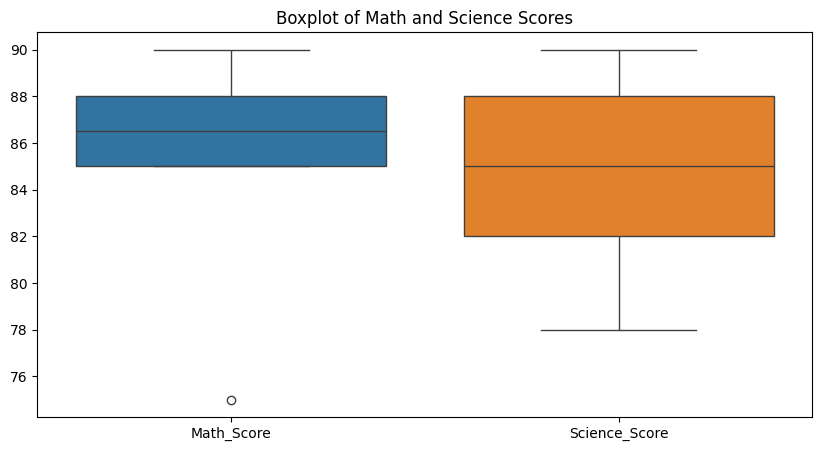

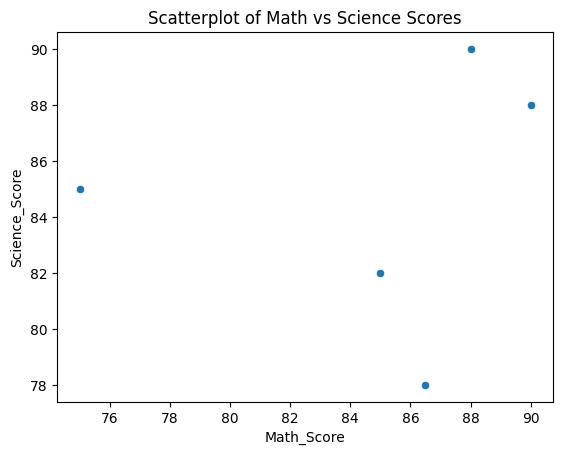


Modified DataFrame:
      Name   Age  Math_Score  Science_Score  Age_StandardScaler  \
0    Alice  20.0        85.0           82.0                -1.5   
1      Bob  21.0        90.0           88.0                -0.5   
2  Charlie  21.5        88.0           90.0                 0.0   
3    David  22.0        75.0           85.0                 0.5   
4      Eva  23.0        86.5           78.0                 1.5   

   Math_Score_MinMaxScaler  Science_Score_MinMaxScaler  
0                 0.666667                    0.333333  
1                 1.000000                    0.833333  
2                 0.866667                    1.000000  
3                 0.000000                    0.583333  
4                 0.766667                    0.000000  


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

# Create a student performance dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [20, 21, np.nan, 22, 23],
    'Math_Score': [85, 90, 88, 75, np.nan],
    'Science_Score': [82, 88, 90, np.nan, 78]
}

df = pd.DataFrame(data)

# 1. Display Missing Values
print("Missing Values:")
print(df.isnull().sum())

# 2. Replace missing values using mean and median

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].median())
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].median())

# 3. Identify outliers using boxplot and scatterplot
plt.figure(figsize=(10, 5))

# Boxplot
sns.boxplot(data=df[['Math_Score', 'Science_Score']])
plt.title('Boxplot of Math and Science Scores')
plt.show()

# Scatterplot
sns.scatterplot(data=df, x='Math_Score', y='Science_Score')
plt.title('Scatterplot of Math vs Science Scores')
plt.show()

# 4. Handle outlier using Z-score method
z_scores_math = np.abs(stats.zscore(df['Math_Score'].dropna()))
z_scores_science = np.abs(stats.zscore(df['Science_Score'].dropna()))

threshold = 3
outliers_math = df[(z_scores_math > threshold)]['Math_Score']
outliers_science = df[(z_scores_science > threshold)]['Science_Score']

df.loc[z_scores_math > threshold, 'Math_Score'] = df['Math_Score'].median()
df.loc[z_scores_science > threshold, 'Science_Score'] = df['Science_Score'].median()

# 5. Perform data normalization using StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df['Age_StandardScaler'] = scaler_standard.fit_transform(df[['Age']])
df['Math_Score_MinMaxScaler'] = scaler_minmax.fit_transform(df[['Math_Score']])
df['Science_Score_MinMaxScaler'] = scaler_minmax.fit_transform(df[['Science_Score']])

# Display modified DataFrame
print("\nModified DataFrame:")
print(df)
